<a href="https://colab.research.google.com/github/TillVollmer5/mass_spectroscopy/blob/main/Qualitative_analyisis_large_peak_nr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [27]:
Auto_1_pm_df = pd.read_csv('/content/drive/My Drive/Qualitative_Tracefinder_Data_2/Car_14_total_Auto1_PF_120k_125.csv')
Auto_1_pg_df = pd.read_csv('/content/drive/My Drive/Qualitative_Tracefinder_Data_2/Car_14_total_Auto1_PUF_hc_120k_138.csv')
Auto_2_gp_df = pd.read_csv('/content/drive/My Drive/Qualitative_Tracefinder_Data_2/Car_14_total_Auto2_PF_120k_147.csv')
Auto_2_pm_df = pd.read_csv('/content/drive/My Drive/Qualitative_Tracefinder_Data_2/Car_14_total_Auto2_PUF_120k_149.csv')
Auto_3_gp_df = pd.read_csv('/content/drive/My Drive/Qualitative_Tracefinder_Data_2/Car_14_total_Auto3_PUF_120k_165.csv')
Auto_3_pm_df = pd.read_csv('/content/drive/My Drive/Qualitative_Tracefinder_Data_2/Car_14_total_Auto3_PF_120k_170.csv')
QC_df = pd.read_csv('/content/drive/My Drive/Qualitative_Tracefinder_Data_2/Car_14_total_QC_Solvent_95_5_120k_169.csv')

In [7]:

Auto_1_pm_df['Ion Type'] = 'pm'
Auto_1_pg_df['Ion Type'] = 'pg'
Auto_2_gp_df['Ion Type'] = 'gp'
Auto_2_pm_df['Ion Type'] = 'pm'
Auto_3_gp_df['Ion Type'] = 'gp'
Auto_3_pm_df['Ion Type'] = 'pm'

Auto_1_pm_df['Sample Name'] = 'Auto_1'
Auto_1_pg_df['Sample Name'] = 'Auto_1'
Auto_2_gp_df['Sample Name'] = 'Auto_2'
Auto_2_pm_df['Sample Name'] = 'Auto_2'
Auto_3_gp_df['Sample Name'] = 'Auto_3'
Auto_3_pm_df['Sample Name'] = 'Auto_3'

dfs = [Auto_1_pm_df, Auto_1_pg_df, Auto_2_gp_df, Auto_2_pm_df, Auto_3_gp_df, Auto_3_pm_df]
df = pd.concat(dfs, ignore_index=True)

df = df.sort_values(by='Retention Time')

n(gp)= 278
n(pm)= 213


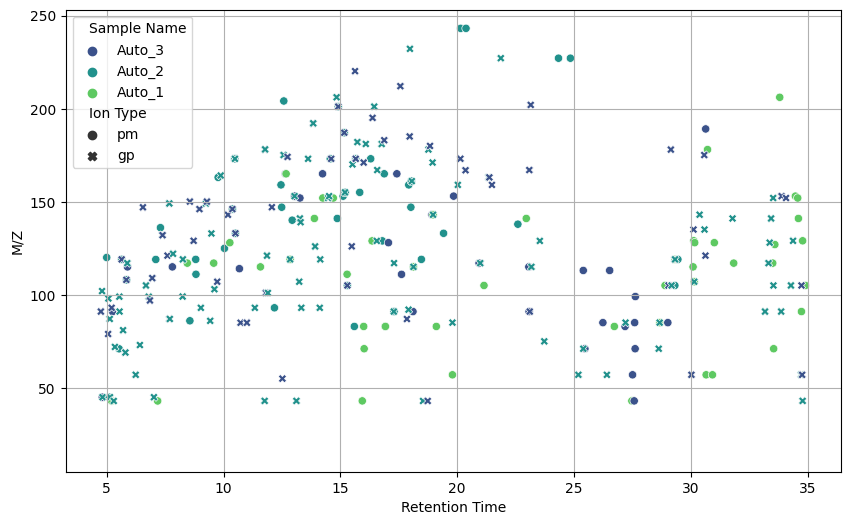

In [4]:
def filter_peaks(group, time_diff_threshold=0.20):
    if len(group) > 1:
        group = group.sort_values(by='ID Source Detail', ascending=False)
        group = group.sort_values(by='Retention Time')

        pm_group = group[group['Ion Type'] == 'pm']
        gp_group = group[group['Ion Type'] == 'gp']

        if not pm_group.empty:

            pm_time_diff = pm_group['Retention Time'].diff()
            pm_group = pm_group.loc[pm_time_diff > time_diff_threshold]
            pm_group = pm_group.drop_duplicates(subset='Retention Time', keep='first', inplace=False)

        if not gp_group.empty:

            gp_time_diff = gp_group['Retention Time'].diff()
            gp_group = gp_group.loc[gp_time_diff > time_diff_threshold]
            gp_group = gp_group.drop_duplicates(subset='Retention Time', keep='first', inplace=False)

        group = pd.concat([pm_group, gp_group], ignore_index=True)

    return group

df_filtered_pm = df[df['Ion Type'] == 'pm'].groupby('Retention Time').apply(filter_peaks)
df_filtered_gp = df[df['Ion Type'] == 'gp'].groupby('Retention Time').apply(filter_peaks)

df_filtered = pd.concat([df_filtered_pm, df_filtered_gp], ignore_index=True)

df_filtered = df_filtered.dropna(subset=['ID Source Detail'])

print('n(gp)=', len(df_filtered_gp['Retention Time']))
print('n(pm)=', len(df_filtered_pm['Retention Time']))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Retention Time', y='M/Z', hue='Sample Name', style='Ion Type', data=df_filtered, palette='viridis')
plt.ylim(5)
plt.grid(True)
plt.show()

                 Peak ID         M/Z  Retention Time          Area  \
0     peak @ 4.79 281.05  281.051239            4.57  2.742177e+07   
1     peak @ 4.68 191.00  191.001007            4.66  4.125338e+07   
2     peak @ 4.69 191.00  191.000992            4.67  1.725790e+07   
3     peak @ 5.01 281.05  281.051208            4.73  3.136225e+07   
4     peak @ 4.86 281.05  281.051208            4.74  6.868900e+06   
..                   ...         ...             ...           ...   
944  peak @ 34.26 207.10  207.102066           34.41  1.001430e+08   
950   peak @ 34.02 57.07   57.069927           34.72  8.947432e+07   
951  peak @ 34.42 105.07  105.069969           34.74  1.726505e+07   
953   peak @ 33.69 57.07   57.069923           34.77  1.883786e+08   
955   peak @ 34.49 43.05   43.054153           34.79  4.518944e+07   

           Height  Potential ID        Mass  Mono Isotopic Mass  Charge State  \
0    2.053193e+06             3  280.247955          280.043976             1 

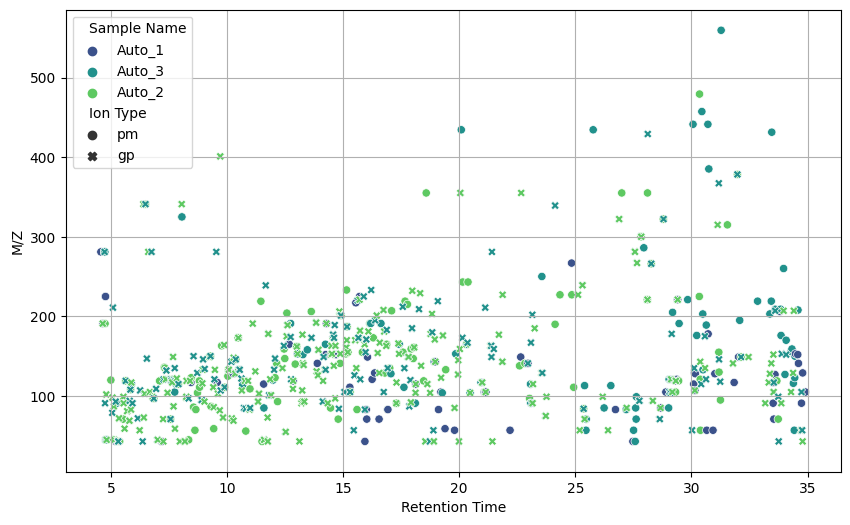

In [42]:
def filter_peaks(group, QC_df, time_diff_threshold=0.5, mz_diff_threshold=0.02):
    if len(group) > 1:
        # Sorting the group by relevant columns
        group = group.sort_values(by='ID Source Detail', ascending=False)
        group = group.sort_values(by='Retention Time')

        # Separating pm and gp groups
        pm_group = group[group['Ion Type'] == 'pm']
        gp_group = group[group['Ion Type'] == 'gp']

        # Filtering pm_group based on time_diff_threshold
        if not pm_group.empty:
            pm_time_diff = pm_group['Retention Time'].diff()
            pm_group = pm_group.loc[pm_time_diff > time_diff_threshold]
            pm_group = pm_group.drop_duplicates(subset='Retention Time', keep='first', inplace=False)

        # Filtering gp_group based on time_diff_threshold
        if not gp_group.empty:
            gp_time_diff = gp_group['Retention Time'].diff()
            gp_group = gp_group.loc[gp_time_diff > time_diff_threshold]
            gp_group = gp_group.drop_duplicates(subset='Retention Time', keep='first', inplace=False)

        # Concatenating the filtered groups
        group = pd.concat([pm_group, gp_group], ignore_index=True)

        group['QC Match'] = False
        # Check against QC_df
        if not group.empty:
            # Add 'QC Match' column to indicate QC match
            for index, row in group.iterrows():
                rt_range = (row['Retention Time'] - time_diff_threshold, row['Retention Time'] + time_diff_threshold)
                mz_range = (row['M/Z'] - mz_diff_threshold, row['M/Z'] + mz_diff_threshold)

                # Corrected variable name: QC_df -> QC_df
                QC_match = QC_df[(QC_df['Retention Time'].between(*rt_range)) & (QC_df['M/Z'].between(*mz_range))]

                if not QC_match.empty:
                    # If a match is found in QC_df, set 'QC Match' to True
                    group.at[index, 'QC Match'] = True

    return group

# Assuming QC_df is your QC data frame
# Correct QC_df for duplicate peaks
QC_df = QC_df.sort_values(by='Retention Time')
QC_df = QC_df.drop_duplicates(subset=['Retention Time', 'M/Z'], keep='first', inplace=False)

# Filtering peaks for 'pm' and 'gp' types
df_filtered_pm = df[df['Ion Type'] == 'pm'].groupby('Retention Time').apply(lambda x: filter_peaks(x, QC_df))
df_filtered_gp = df[df['Ion Type'] == 'gp'].groupby('Retention Time').apply(lambda x: filter_peaks(x, QC_df))

# Concatenating the filtered dataframes
df_filtered = pd.concat([df_filtered_pm, df_filtered_gp], ignore_index=True)

# Drop rows with missing values in the 'ID Source Detail' column
df_filtered = df_filtered.dropna(subset=['ID Source Detail'])

print(df_filtered)
# Print the number of QC matches
print('Number of QC Matches:', len(df_filtered[df_filtered['QC Match'] == True]))

df_gp = combined_df[combined_df['Ion Type'] == 'gp']
df_pm = combined_df[combined_df['Ion Type'] == 'pm']
# Display the combined dataframe
print('n(gp)=', len(df_gp['Retention Time']))
print('n(pm)=', len(df_pm['Retention Time']))

# Rest of your code for plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Retention Time', y='M/Z', hue='Sample Name', style='Ion Type', data=df_filtered, palette='viridis')
plt.ylim(5)
plt.grid(True)
plt.show()


n(gp)= 1600
n(pm)= 2369


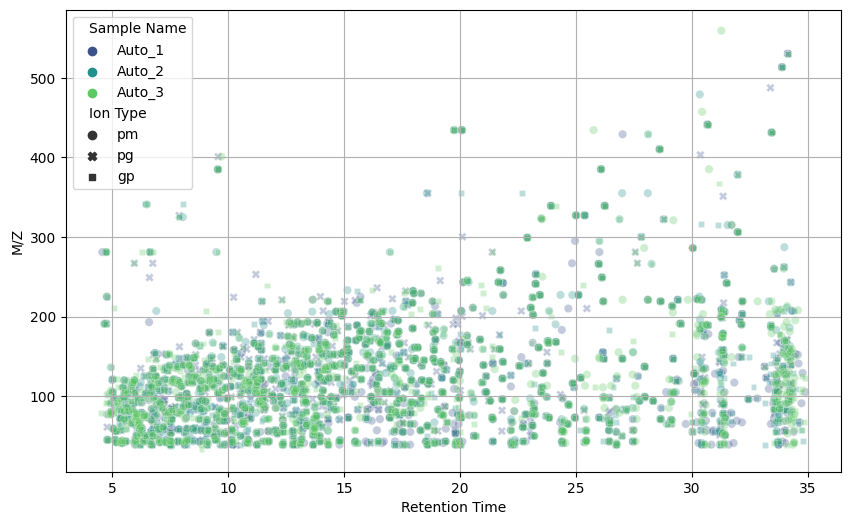

In [25]:
# Function to filter dataframe based on Retention Time and M/Z
def filter_dataframe(df):
    df = df.sort_values(by=['Retention Time', 'M/Z'], ascending=[True, True])
    df = df.drop_duplicates(subset='Retention Time', keep='first')
    return df

# Apply the filter function to each dataframe
Auto_1_pm_df = filter_dataframe(Auto_1_pm_df)
Auto_1_pg_df = filter_dataframe(Auto_1_pg_df)
Auto_2_gp_df = filter_dataframe(Auto_2_gp_df)
Auto_2_pm_df = filter_dataframe(Auto_2_pm_df)
Auto_3_gp_df = filter_dataframe(Auto_3_gp_df)
Auto_3_pm_df = filter_dataframe(Auto_3_pm_df)
QC_df = filter_dataframe(QC_df)

def filter_auto_not_in_qc(auto_df, qc_df, rt_threshold=30, mz_threshold=1000):
    common_cols = ['Retention Time', 'M/Z']
    merged_df = pd.merge(auto_df, qc_df, on=common_cols, how='left', indicator=True)

    # Create boolean masks for filtering based on thresholds
    rt_mask = (merged_df['_merge'] == 'left_only') & (abs(merged_df['Retention Time'] - merged_df['Retention Time']) <= rt_threshold)
    mz_mask = abs(merged_df['M/Z'] - merged_df['M/Z']) <= mz_threshold

    # Apply the masks to get the final filtered dataframe
    filtered_auto_df = merged_df[rt_mask & mz_mask].drop('_merge', axis=1)

    return filtered_auto_df


# Apply the function to each Auto dataframe
filtered_Auto_1_pm_df = filter_auto_not_in_qc(Auto_1_pm_df, QC_df)
filtered_Auto_1_pg_df = filter_auto_not_in_qc(Auto_1_pg_df, QC_df)
filtered_Auto_2_gp_df = filter_auto_not_in_qc(Auto_2_gp_df, QC_df)
filtered_Auto_2_pm_df = filter_auto_not_in_qc(Auto_2_pm_df, QC_df)
filtered_Auto_3_gp_df = filter_auto_not_in_qc(Auto_3_gp_df, QC_df)
filtered_Auto_3_pm_df = filter_auto_not_in_qc(Auto_3_pm_df, QC_df)

# Combine the filtered dataframes
combined_df = pd.concat([filtered_Auto_1_pm_df, filtered_Auto_1_pg_df, filtered_Auto_2_gp_df,
                        filtered_Auto_2_pm_df, filtered_Auto_3_gp_df, filtered_Auto_3_pm_df])

# Optionally, you can reset the index of the combined dataframe
combined_df.reset_index(drop=True, inplace=True)

df_gp = combined_df[combined_df['Ion Type'] == 'gp']
df_pm = combined_df[combined_df['Ion Type'] == 'pm']
# Display the combined dataframe
print('n(gp)=', len(df_gp['Retention Time']))
print('n(pm)=', len(df_pm['Retention Time']))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Retention Time', y='M/Z', hue='Sample Name', style='Ion Type', data=combined_df, palette='viridis', alpha=0.3)
plt.ylim(5)
plt.grid(True)
plt.show()